In [2]:
setwd("~/WGS//SNPS//12_07/")

In [3]:
fst=read.table("slidingwindow", row.names=NULL, header=TRUE)

In [4]:
head(fst)

row.names,region,chr,midPos,Nsites
"(357,5271)(500,5499)(500,5500)",AAPE02055386,3000,4916,0.098678
"(857,5771)(1000,5999)(1000,6000)",AAPE02055386,3500,4916,0.097179
"(1357,6271)(1500,6499)(1500,6500)",AAPE02055386,4000,4916,0.097014
"(1857,6771)(2000,6999)(2000,7000)",AAPE02055386,4500,4916,0.096539
"(2357,7271)(2500,7499)(2500,7500)",AAPE02055386,5000,4916,0.095201
"(2836,7763)(3000,7999)(3000,8000)",AAPE02055386,5500,4929,0.094678


In [5]:
fst$row.names=NULL

In [6]:
head(fst)

region,chr,midPos,Nsites
AAPE02055386,3000,4916,0.098678
AAPE02055386,3500,4916,0.097179
AAPE02055386,4000,4916,0.097014
AAPE02055386,4500,4916,0.096539
AAPE02055386,5000,4916,0.095201
AAPE02055386,5500,4929,0.094678


In [7]:
colnames(fst)=c("Scaffold","midPos", "Nsites", "FST")

In [8]:
head(fst)

Scaffold,midPos,Nsites,FST
AAPE02055386,3000,4916,0.098678
AAPE02055386,3500,4916,0.097179
AAPE02055386,4000,4916,0.097014
AAPE02055386,4500,4916,0.096539
AAPE02055386,5000,4916,0.095201
AAPE02055386,5500,4929,0.094678


In [9]:
fst$ScaffoldNum=as.numeric(as.factor(fst$Scaffold))

In [10]:
nrow(fst)

[1] 3892511

In [11]:
tail(fst)

,Scaffold,midPos,Nsites,FST,ScaffoldNum
3892506,GL433172,11000,1130,0.123437,11652
3892507,GL433172,11500,630,0.154347,11652
3892508,GL433172,12000,130,0.128494,11652
3892509,GL433172,14500,289,0.043607,11652
3892510,GL433172,15000,780,0.116784,11652
3892511,GL433173,3000,2817,0.086459,11653


Try just plotting high FST values

In [22]:
fstHigh=fst[fst$FST>=0.15,]

In [23]:
nrow(fstHigh)

[1] 320

In [24]:
head(fstHigh)

,Scaffold,midPos,Nsites,FST,ScaffoldNum
5026,AAPE02058399,15500,5001,0.154863,34
5027,AAPE02058399,16000,5001,0.150863,34
5029,AAPE02058399,17000,5001,0.150583,34
5030,AAPE02058399,17500,5001,0.151692,34
6909,AAPE02059158,3500,4553,0.152081,54
6910,AAPE02059158,4000,4575,0.151621,54


In [15]:
require(ggplot2)

Loading required package: ggplot2


In [30]:
TrueScaffolds=as.character(unique(fstHigh$Scaffold))

In [31]:
TrueScaffolds

[1] "AAPE02058399" "AAPE02059158" "AAPE02061811" "AAPE02063868" "AAPE02064206"
 [6] "AAPE02066955" "AAPE02067232" "AAPE02070517" "AAPE02072785" "GL429767"    
[11] "GL429768"     "GL429770"     "GL429771"     "GL429774"     "GL429777"    
[16] "GL429778"     "GL429779"     "GL429782"     "GL429783"     "GL429786"    
[21] "GL429788"     "GL429792"     "GL429799"     "GL429823"     "GL429854"    
[26] "GL429858"     "GL429864"     "GL429871"     "GL429873"     "GL429878"    
[31] "GL429896"     "GL429905"     "GL429908"     "GL429909"     "GL429912"    
[36] "GL429920"     "GL429952"     "GL429956"     "GL429999"     "GL430016"    
[41] "GL430038"     "GL430055"     "GL430056"     "GL430060"     "GL430077"    
[46] "GL430081"     "GL430103"     "GL430134"     "GL430183"     "GL430225"    
[51] "GL430251"     "GL430359"     "GL430361"     "GL430390"     "GL430434"    
[56] "GL430478"     "GL430496"     "GL430583"     "GL430625"     "GL430810"    
[61] "GL430910"     "GL430934"     "GL430970"     "GL431144"     "GL431256"    
[66] "GL431305"     "GL431379"     "GL431389"     "GL431680"     "GL431998"    
[71] "GL432554"     "GL432640"     "GL432699"     "GL432816"     "GL433172"

In [27]:
fstHigh$ScaffoldNum2=as.numeric(as.factor(fstHigh$ScaffoldNum))

In [28]:
tail(fstHigh)

,Scaffold,midPos,Nsites,FST,ScaffoldNum,ScaffoldNum2
3890477,GL432816,6500,4656,0.167502,11296,74
3890478,GL432816,7000,4564,0.162710,11296,74
3890479,GL432816,7500,4691,0.165095,11296,74
3890480,GL432816,8000,4691,0.181364,11296,74
3890481,GL432816,8500,4691,0.177286,11296,74
3892507,GL433172,11500,630,0.154347,11652,75


In [18]:
install.packages("qqman")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [18]:
require(qqman)

Loading required package: qqman

For example usage please run: vignette('qqman')

Citation appreciated but not required:
Turner, S.D. qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. biorXiv DOI: 10.1101/005165 (2014).



Warning message in manhattan(fstHigh, chr = "ScaffoldNum2", bp = "Nsites", p = "FST", :
“No SNP column found. OK unless you're trying to highlight.”

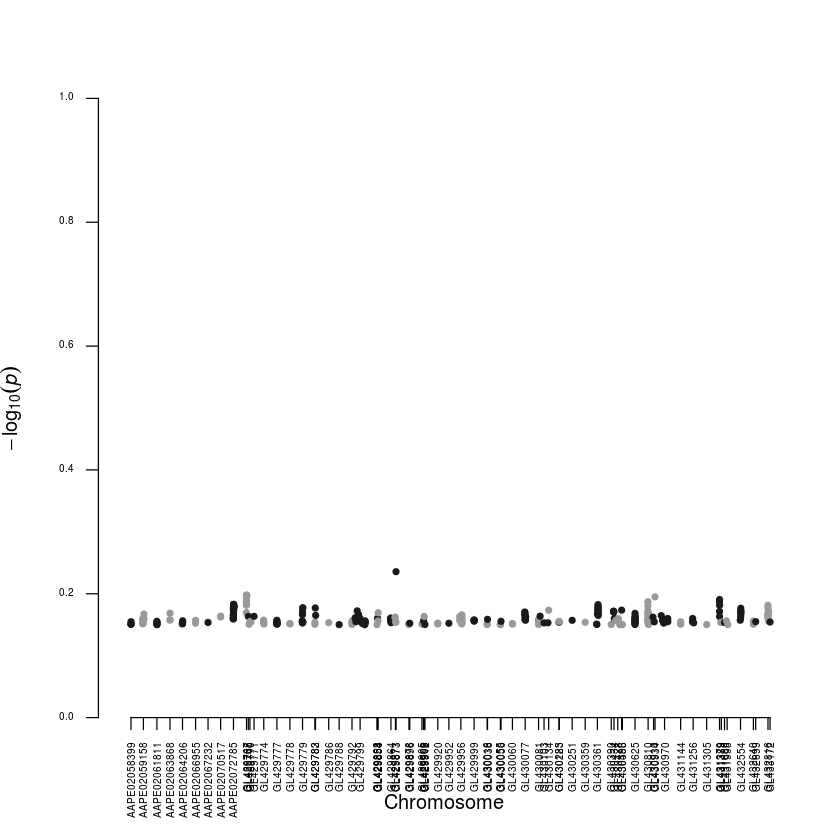

In [42]:
plot=manhattan(fstHigh, chr = "ScaffoldNum2", bp = "Nsites", p = "FST", 
col = c("gray10", "gray60"), chrlabs = TrueScaffolds, logp=FALSE, las=2, cex.axis=0.5)

MAybe you should try plotting all windows for those chromosomes that have an outlier? Or maybe go back and make bigger windows so you can plot them better? 

In [ ]:
plot=manhattan(fst, chr = "ScaffoldNum", bp = "midPos", p = "FST", 
col = c("gray10", "gray60"), chrlabs = NULL)

Warning message in manhattan(fst, chr = "ScaffoldNum", bp = "midPos", p = "FST", :
“No SNP column found. OK unless you're trying to highlight.”

In [ ]:
plot=ggplot(data=fstHigh, aes(x=midPos, y=FST))+
  geom_point(data=fstHigh)+
  theme_bw()+ facet_grid(.~ScaffoldNum)

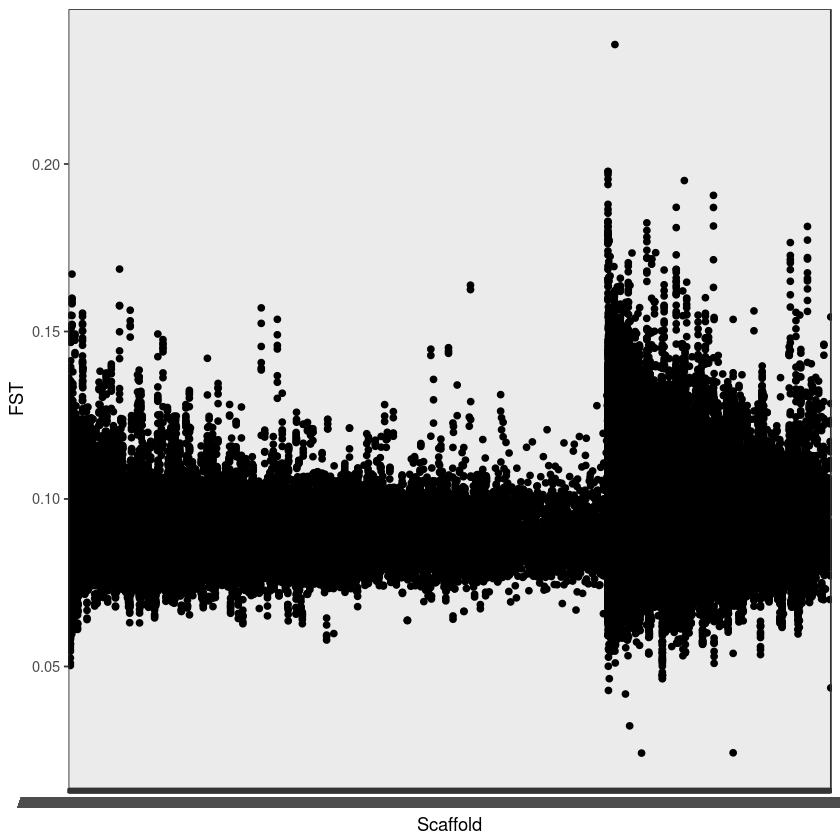

In [16]:
##plot of fst by scaffold